# pandas DataFrameの基礎
## Agenda

- pandas.DataFrameを用いたETL処理を確認する

### 参考

- https://qiita.com/ishida330/items/922caa7acb73c1540e28


In [1]:
## create the clean environment
import gc
import matplotlib.pyplot as plt

def clear_all():
    # Clears all the variables from the workspace
    gl = globals().copy()
    for var in gl:
        if var in clean_env_var: continue
        del globals()[var]
    # Garbage collection:
    gc.collect()

def close_plots():
  my_plots = plt.get_fignums()
  for j in my_plots:
    plt.close(plt.figure(j))

clean_env_var = dir()
clean_env_var.append('clean_env_var')

In [2]:
clear_all()

### Hardware

In [3]:
%%bash
system_profiler SPHardwareDataType | grep -E \
"Model Identifier"\|"Processor Name"\|"Processor Speed"\
\|"Number of Processors"\|"Memory:"

      Model Identifier: MacBookPro13,1
      Processor Name: Dual-Core Intel Core i5
      Processor Speed: 2 GHz
      Number of Processors: 1
      Memory: 16 GB


### Python

In [4]:
!python -V

Python 3.7.4


### Install modules

In [5]:
pass

### Import modules

In [6]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

## 1. DataFrameとは

- spreadsheet的なデータを高速にロードし、操作し、整列させ、マージなどの処理をするツール
- データ処理のプロセスを自動化、再現可能にするために用いる
- data型は`Series`と`DataFrame`
- pandasは標準ライブラリではないので明示的にimportする必要がある

### Dataのロード

In [7]:
url = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/gapminder.tsv'
df = pd.read_csv(url, sep = '\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Data typeの確認

In [8]:
type(df)

pandas.core.frame.DataFrame

shapeの確認

In [9]:
df.shape

(1704, 6)

In [10]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [11]:
type(df.columns)

pandas.core.indexes.base.Index

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### pandasの型と、Pythonの型との比較

|pandas|Python|説明|
|---|---|---|
|`object`|`string`||
|`int64`|`int`|整数|
|`float64`|`float`||
|`datetime64`|`datetime`|datetimeはPython標準ライブラリにある（組み込み型ではないので明示的にimportする必要がある）|

### locとiloc

- `loc`: indexラベルによるデータの絞り込み
- `iloc`" index番号によsるデータの絞り込み

In [13]:
df.loc[:, ['country', 'pop', 'gdpPercap']].head()

,country,pop,gdpPercap
0,Afghanistan,8425333,779.445314
1,Afghanistan,9240934,820.853030
2,Afghanistan,10267083,853.100710
3,Afghanistan,11537966,836.197138
4,Afghanistan,13079460,739.981106


In [14]:
small_range = list(range(1, 10, 2))
df.iloc[small_range]

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


### slicing

- `:`(コロン)を用いて範囲を指定

In [15]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [16]:
df.iloc[:, ::2].head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [17]:
df.iloc[:, :2].head()

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia


In [18]:
df.iloc[:, :6:2].head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


### Tips

- データ絞り込みを実施する場合、可能な限り列名を指定して実施する
- Readabilityの観点からの要請

### Groupby

In [19]:
grouped_df = df.groupby('year')['lifeExp'].mean()
type(grouped_df)

pandas.core.series.Series

In [20]:
grouped_df

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [21]:
del grouped_df

In [22]:
grouped_df = df.groupby('year')[['lifeExp', 'pop']].mean()
type(grouped_df)

pandas.core.frame.DataFrame

In [23]:
grouped_df

,lifeExp,pop
year,,
1952,49.057620,1.695040e+07
1957,51.507401,1.876341e+07
1962,53.609249,2.042101e+07
1967,55.678290,2.265830e+07
1972,57.647386,2.518998e+07
1977,59.570157,2.767638e+07
1982,61.533197,3.020730e+07
1987,63.212613,3.303857e+07
1992,64.160338,3.599092e+07


In [24]:
grouped_df = df.groupby(['year', 'continent'])[['lifeExp', 'pop']].mean()
type(grouped_df)

pandas.core.frame.DataFrame

In [25]:
grouped_df

lifeExp           pop
year continent                         
1952 Africa     39.135500  4.570010e+06
     Americas   53.279840  1.380610e+07
     Asia       46.314394  4.228356e+07
     Europe     64.408500  1.393736e+07
     Oceania    69.255000  5.343003e+06
1957 Africa     41.266346  5.093033e+06
     Americas   55.960280  1.547816e+07
     Asia       49.318544  4.735699e+07
     Europe     66.703067  1.459635e+07
     Oceania    70.295000  5.970988e+06
1962 Africa     43.319442  5.702247e+06
     Americas   58.398760  1.733081e+07
     Asia       51.563223  5.140476e+07
     Europe     68.539233  1.534517e+07
     Oceania    71.085000  6.641759e+06
1967 Africa     45.334538  6.447875e+06
     Americas   60.410920  1.922986e+07
     Asia       54.663640  5.774736e+07
     Europe     69.737600  1.603930e+07
     Oceania    71.310000  7.300207e+06
1972 Africa     47.450942  7.305376e+06
     Americas   62.394920  2.117537e+07
     Asia       57.319269  6.518098e+07
     Europe     70.775033  1.668784e+07
     Oceania    71.910000  8.053050e+06
1977 Africa     49.580423  8.328097e+06
     Americas   64.391560  2.312271e+07
     Asia       59.610556  7.225799e+07
     Europe     71.937767  1.723882e+07
     Oceania    72.855000  8.619500e+06
1982 Africa     51.592865  9.602857e+06
     Americas   66.228840  2.521164e+07
     Asia       62.617939  7.909502e+07
     Europe     72.806400  1.770890e+07
     Oceania    74.290000  9.197425e+06
1987 Africa     53.344788  1.105450e+07
     Americas   68.090720  2.731016e+07
     Asia       64.851182  8.700669e+07
     Europe     73.642167  1.810314e+07
     Oceania    75.320000  9.787208e+06
1992 Africa     53.629577  1.267464e+07
     Americas   69.568360  2.957096e+07
     Asia       66.537212  9.494825e+07
     Europe     74.440100  1.860476e+07
     Oceania    76.945000  1.045983e+07
1997 Africa     53.598269  1.430448e+07
     Americas   71.150480  3.187602e+07
     Asia       68.020515  1.025238e+08
     Europe     75.505167  1.896480e+07
     Oceania    78.190000  1.112072e+07
2002 Africa     53.325231  1.603315e+07
     Americas   72.422040  3.399091e+07
     Asia       69.233879  1.091455e+08
     Europe     76.700600  1.927413e+07
     Oceania    79.740000  1.172741e+07
2007 Africa     54.806038  1.787576e+07
     Americas   73.608120  3.595485e+07
     Asia       70.728485  1.155138e+08
     Europe     77.648600  1.953662e+07
     Oceania    80.719500  1.227497e+07

In [26]:
grouped_df.reset_index()

,year,continent,lifeExp,pop
0,1952,Africa,39.135500,4.570010e+06
1,1952,Americas,53.279840,1.380610e+07
2,1952,Asia,46.314394,4.228356e+07
3,1952,Europe,64.408500,1.393736e+07
4,1952,Oceania,69.255000,5.343003e+06
5,1957,Africa,41.266346,5.093033e+06
6,1957,Americas,55.960280,1.547816e+07
7,1957,Asia,49.318544,4.735699e+07
8,1957,Europe,66.703067,1.459635e+07
9,1957,Oceania,70.295000,5.970988e+06


### Groupごとの度数/頻度

In [27]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [28]:
df.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: country, Length: 142, dtype: int64

## 2. pandasのデータ構造

### Seriesを作る

- Pythonの組み込みデータ型と同じく、１次元のコンテナ
- 要素のdtypeは全て同じでなければならない


In [29]:
s = pd.Series(['test', 10])
s

0    test
1      10
dtype: object

In [30]:
s = pd.Series(['test', 10], index = ['test_1', 'test_2'])
s

test_1    test
test_2      10
dtype: object

from ndarray

In [31]:
data = np.random.normal(0, 1, 10)
index = np.arange(10)
s = pd.Series(data, index=index)
s

0    0.331614
1    0.691510
2   -1.005348
3   -1.092859
4    1.679783
5   -1.213504
6   -0.688585
7   -1.720754
8    0.370898
9    1.187273
dtype: float64

from dict

In [32]:
d = {'b': 1, 'a': 0, 'c': 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

from scalar value

In [33]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

### Series is ndarray-like

In [34]:
s[0]

0.3316142961827409

In [35]:
s[0:3]

0    0.331614
1    0.691510
2   -1.005348
dtype: float64

In [36]:
s[[4, 3, 1]]

4    1.679783
3   -1.092859
1    0.691510
dtype: float64

In [37]:
s[s>s.mean()]

0    0.331614
1    0.691510
4    1.679783
8    0.370898
9    1.187273
dtype: float64

In [38]:
s.values

array([ 0.3316143 ,  0.69150971, -1.00534846, -1.09285935,  1.67978296,
       -1.21350361, -0.6885847 , -1.72075393,  0.37089831,  1.18727266])

### The D’Hondt Methodとpandas Series

- 会社の各チームへ会議の座席(合計で`N`)を割り当てる担当になったとする。
- 各チームの人数に応じて座席を割り当てたい
- ドント方式に基づいて座席を割り当てるとする

#### ドント方式

- V: total number of votes
- s: given seat
- t: iteration

updating rule

1. s = [0, 0, ..., 0]
2. compute $d_{it} = \frac{V}{s_{it}+1}$ for each i
3. given $d_{it}$, assign a seat to the party who has the highest $d_{it}$
4. if $\sum(s_{it}) = N$, break, otherwise go back to 2


In [39]:
def dhondt_rule(voting_power, seat_num):
    seat = np.zeros(len(voting_power), dtype = np.float)
    while sum(seat) < seat_num:
        denominator = 1 + seat
        update_power = voting_power / denominator
        update_index = np.argmax(update_power)
        seat[update_index] += 1
    
    return seat    

#### Test case

- Test caseはこちらを参照 [here](https://plus.maths.org/content/maths-minute-dhondt-method)


In [40]:
voting_power = np.array([20, 15, 25])
assignment = dhondt_rule(voting_power = voting_power, seat_num = 5)
answer = np.array([2, 1, 2])
np.testing.assert_array_equal(assignment, answer)

#### using pandas.Series

In [41]:
def dhondt_rule_pandas(voting_power, seat_num):
    seat = pd.Series(0, index = list(voting_power.index))
    while seat.sum() < seat_num:
        denominator = seat + 1
        update_power = voting_power / denominator
        update_index = update_power.idxmax()
        seat[update_index] += 1
    
    return seat  

Test



In [42]:
data = pd.Series({'A': 20, 'B':15, 'C': 25})
dhondt_rule_pandas(voting_power = data, seat_num = 5)

A    2
B    1
C    2
dtype: int64

### pandas.Seriesで使えるattribute

- `loc`
- `iloc`
- `dtype`, `dtypes`
- `shape`
- `size`: Seriesにある全要素の数
- `values`: Seriesのndarray

### pandas.Series.append

2つ以上のSeriesを結合させる

In [43]:
s1 = pd.Series([1, 2, 3])
s2 = pd.Series([4, 5, 6])
s3 = pd.Series([4, 5, 6], index=[3, 4, 5])
s1.append(s2)

0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64

In [44]:
s1.append(s3)

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [45]:
s1.append(s2, ignore_index=True)

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

### pandas.Series.corr

```
Series.corr(self, other, method='pearson', min_periods=None)
```
Compute correlation with other Series, excluding missing values.

Parameters

- otherSeries:Series with which to compute the correlation.
- method{‘pearson’, ‘kendall’, ‘spearman’} or callable: Method used to compute correlation:
    - pearson : Standard correlation coefficient
    - kendall : Kendall Tau correlation coefficient
    - spearman : Spearman rank correlation
    - callable: Callable with input two 1d ndarrays and returning a float.
- min_periodsint, optional: Minimum number of observations needed to have a valid result.


In [46]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

s1 = pd.Series([.2, .0, .6, .2])
s2 = pd.Series([.3, .6, .0, .1])
s1.corr(s2, method=histogram_intersection)

0.3

In [47]:
s1.corr(s2)

-0.85106449634699

In [48]:
s1.corr(s2, method = 'kendall')

-0.912870929175277

### pandas.Series.drop_duplicates

```
Series.drop_duplicates(self, keep='first', inplace=False)
```

Return Series with duplicate values removed.

Parameters
- keep{‘first’, ‘last’, False}, default ‘first’: Method to handle dropping duplicates:
    - ‘first’ : Drop duplicates except for the first occurrence.
    - ‘last’ : Drop duplicates except for the last occurrence.
    - False : Drop all duplicates.
- inplacebool, default False: If True, performs operation inplace and returns None.

In [49]:
s = pd.Series(['lama', 'cow', 'lama', 'beetle', 'lama', 'hippo'],
               name='animal')
s

0      lama
1       cow
2      lama
3    beetle
4      lama
5     hippo
Name: animal, dtype: object

In [50]:
s.drop_duplicates()

0      lama
1       cow
3    beetle
5     hippo
Name: animal, dtype: object

In [51]:
s.drop_duplicates(keep = 'last')

1       cow
3    beetle
4      lama
5     hippo
Name: animal, dtype: object

### pandas.Series.hist

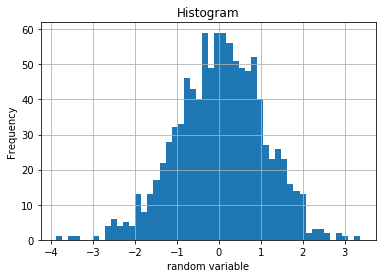

In [52]:
data = pd.Series(np.random.randn(1000))
data.hist(bins = 50)
plt.ylabel('Frequency')
plt.xlabel('random variable')
plt.title('Histogram');

### pandas.Series.isin

In [53]:
s = pd.Series(['lama', 'cow', 'lama', 'beetle', 'lama',
               'hippo'], name='animal')
s.isin(['cow', 'lama'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: animal, dtype: bool

### pandas.Series.to_frame

pandas.Seriesをpandas.DataFrame objectへ変換する

In [54]:
s = pd.Series(["a", "b", "c"],
              name="vals")
s.to_frame()

,vals
0,a
1,b
2,c


In [55]:
pd.date_range('2019-10-01', periods= 10, freq = 'D').to_frame().reset_index(drop = True)

,0
0,2019-10-01
1,2019-10-02
2,2019-10-03
3,2019-10-04
4,2019-10-05
5,2019-10-06
6,2019-10-07
7,2019-10-08
8,2019-10-09
9,2019-10-10


### 条件抽出

In [56]:
s = pd.date_range('2019-10-01', periods= 10, freq = 'D')
s = pd.Series(s, name = 'date')
s

0   2019-10-01
1   2019-10-02
2   2019-10-03
3   2019-10-04
4   2019-10-05
5   2019-10-06
6   2019-10-07
7   2019-10-08
8   2019-10-09
9   2019-10-10
Name: date, dtype: datetime64[ns]

In [57]:
s[s> '2019-10-08']

8   2019-10-09
9   2019-10-10
Name: date, dtype: datetime64[ns]

In [58]:
s[s > s.mean()]

5   2019-10-06
6   2019-10-07
7   2019-10-08
8   2019-10-09
9   2019-10-10
Name: date, dtype: datetime64[ns]

In [59]:
s[s > s.quantile(.5)]

5   2019-10-06
6   2019-10-07
7   2019-10-08
8   2019-10-09
9   2019-10-10
Name: date, dtype: datetime64[ns]

### pandas.Seriesのindex shuffle

In [60]:
s = pd.date_range('2019-10-01', periods= 10, freq = 'D')
s = pd.Series(s)
s_2 = s.copy()
s

0   2019-10-01
1   2019-10-02
2   2019-10-03
3   2019-10-04
4   2019-10-05
5   2019-10-06
6   2019-10-07
7   2019-10-08
8   2019-10-09
9   2019-10-10
dtype: datetime64[ns]

In [61]:
s = s.sample(len(s), random_state = 42).reset_index(drop = True)
s

0   2019-10-09
1   2019-10-02
2   2019-10-06
3   2019-10-01
4   2019-10-08
5   2019-10-03
6   2019-10-10
7   2019-10-05
8   2019-10-04
9   2019-10-07
dtype: datetime64[ns]

In [62]:
s_2 - s

0   -8 days
1    0 days
2   -3 days
3    3 days
4   -3 days
5    3 days
6   -3 days
7    3 days
8    5 days
9    3 days
dtype: timedelta64[ns]

### Tips: 演算の自動的な整列とベクトル化

- pandas.Series/DataFrameのメソッドの多くはベクトル化されており、ベクトル全体を同時に処理してくれる =　処理が早い
- 計算前にindex labelに基づいたsortを実施 = 自動的な整列

### DataFrameを作る

- DataFrameはSeriesオブジェクトの辞書だと考えることができる
- キーが列の名前、valueが列の内容

In [63]:
pd.DataFrame({
    'Name': ['John', 'Adam'],
    'imcome': np.arange(2),
    'Age': [36, 98],
    'Born':[1990, 1991]
})

,Name,imcome,Age,Born
0,John,0,36,1990
1,Adam,1,98,1991


Python 3.7以降は辞書の順番は保証される。それ以前のversionで順序付きのdictが欲しい場合はcollections moduleの`OrderedDict`を使わなければならない（Python 3.7以降はいらない）。

In [64]:
from collections import OrderedDict

pd.DataFrame(OrderedDict([
    ('Name', ['John', 'Adam']),
    ('imcome', np.arange(2)),
    ('Age',[36, 98])
    ]))


,Name,imcome,Age
0,John,0,36
1,Adam,1,98


### 二つのDataFrameが等しいかどうかの確認

datasetの作成

In [65]:
np.random.seed(101)
df = pd.DataFrame(np.random.randint(1, 4, size  = (3, 5)), columns=list("abcde"))
df["c"] = np.nan
other = df.copy()
df

,a,b,c,d,e
0,2,3,NaN,2,2
1,1,1,NaN,2,1
2,1,1,NaN,2,1


copyしたDataFrame同士をまず要素で比較

In [66]:
df == other

,a,b,c,d,e
0,True,True,False,True,True
1,True,True,False,True,True
2,True,True,False,True,True


np.naの比較

In [67]:
np.nan == np.nan, np.nan != np.nan

(False, True)

pandas.DataFrameのmethodを用いて比較

In [68]:
df.equals(other)

True

等しくないColumnとIndexの特定およびどれくらい等しいか

In [69]:
test = df == other
test

,a,b,c,d,e
0,True,True,False,True,True
1,True,True,False,True,True
2,True,True,False,True,True


In [70]:
pd.DataFrame(test.all(axis=1))

,0
0,False
1,False
2,False


In [71]:
pd.DataFrame(test.all(axis=0)).T

,a,b,c,d,e
0,True,True,False,True,True


In [72]:
pd.concat(
    [
        pd.DataFrame(test.sum()).T,
        pd.DataFrame(test.sum()).T / len(df)
    ]
, ignore_index=True)

,a,b,c,d,e
0,3.0,3.0,0.0,3.0,3.0
1,1.0,1.0,0.0,1.0,1.0


In [73]:
with pd.option_context("display.float_format", "{:.2f}%".format):
    print(pd.DataFrame(test.sum()).T / len(df) * 100)

        a       b     c       d       e
0 100.00% 100.00% 0.00% 100.00% 100.00%


## 3. plotによるグラフ描画

### アンスコムの例

mean, variance, correlation, regression lineが同一だがplotすると一眼で異なる分布とわかる例

In [74]:
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


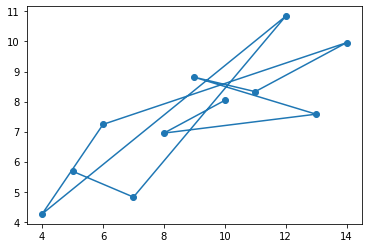

In [75]:
df_1 = anscombe[anscombe['dataset'] == 'I']
plt.plot(df_1.x, df_1.y, marker = 'o');

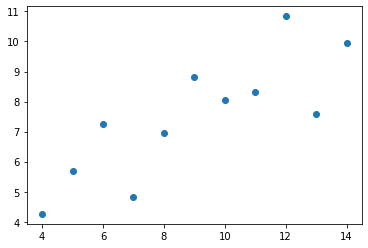

In [76]:
plt.plot(df_1.x, df_1.y, 'o');

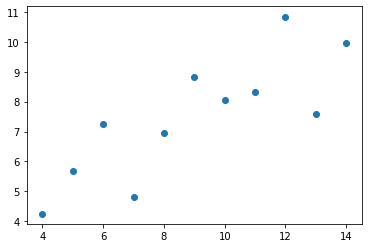

In [77]:
plt.scatter(df_1.x, df_1.y);

datasetを比較

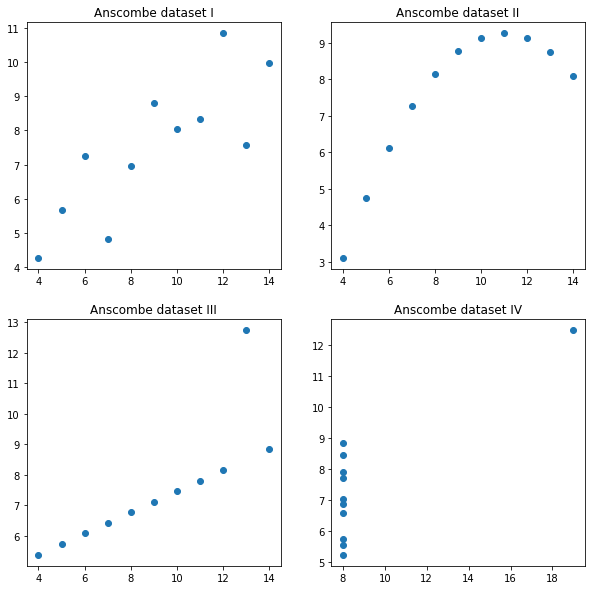

In [78]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
for num, i in enumerate(['I', "II", 'III', 'IV']):
    ind_1, ind_2 = np.divmod(num, 2)
    tmp_df = anscombe[anscombe['dataset'] == i]
    ax[ind_1, ind_2].plot(tmp_df['x'], tmp_df['y'], 'o')
    ax[ind_1, ind_2].set_title('Anscombe dataset {}'.format(i))
    

### matplotlibの構造

<img src = "https://matplotlib.org/3.1.1/_images/anatomy.png">

### Histogram

In [79]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


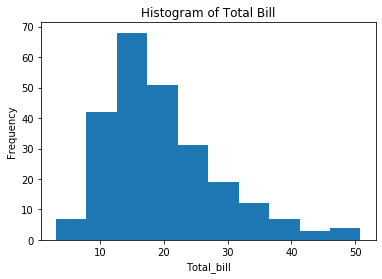

In [80]:
plt.hist(tips['total_bill'], bins = 10)
plt.title('Histogram of Total Bill')
plt.xlabel('Total_bill')
plt.ylabel('Frequency')
plt.show()

### 2変量データとscatter plot


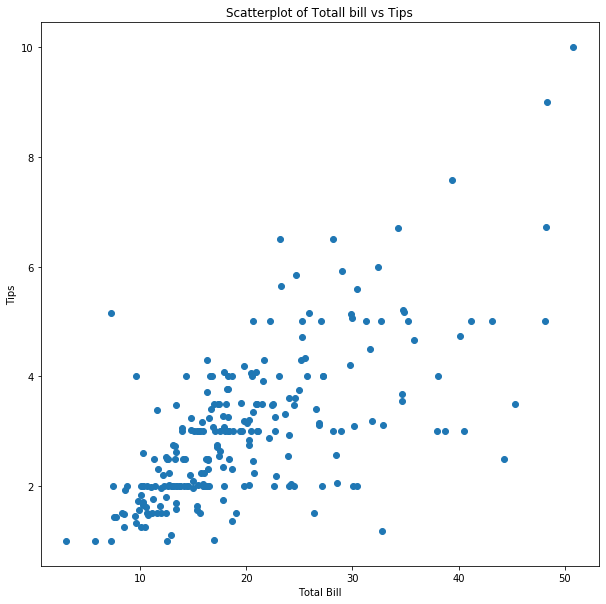

In [81]:
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.scatter(tips['total_bill'], tips['tip'])
ax.set_title('Scatterplot of Totall bill vs Tips')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tips');

### boxplot

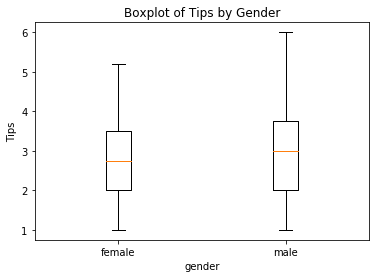

In [82]:
isfemale = tips['sex'] == 'Female'
plt.boxplot([tips[isfemale]['tip'],
            tips[~isfemale]['tip']],
           labels = ['female', 'male'], showfliers = False)
plt.xlabel('gender')
plt.ylabel('Tips')
plt.title('Boxplot of Tips by Gender');

```
Beyond the whiskers, data are considered outliers and are plotted as individual points
```
とのこと。

- Lowerlimit: $Q1 - 1.5 \times (Q3 - Q1)$
- Upperlimit: $Q3 + 1.5 \times (Q3 - Q1)$
- QはQuantile

表示させたい場合はshowfilterをTrueに設定。 

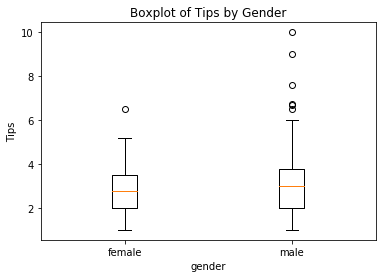

In [83]:
isfemale = tips['sex'] == 'Female'
plt.boxplot([tips[isfemale]['tip'],
            tips[~isfemale]['tip']],
           labels = ['female', 'male'], showfliers = True)
plt.xlabel('gender')
plt.ylabel('Tips')
plt.title('Boxplot of Tips by Gender');

### 多変量データ

- 色やドットサイズを活用して多次元のデータを二次元プロットによく落とし込む
- 人間は面積の差を認識するのは得意ではない
- 面積の違いよりも色の違いの方が認識しやすいが、各色が何に対応しているかをメモリで示すことが重要

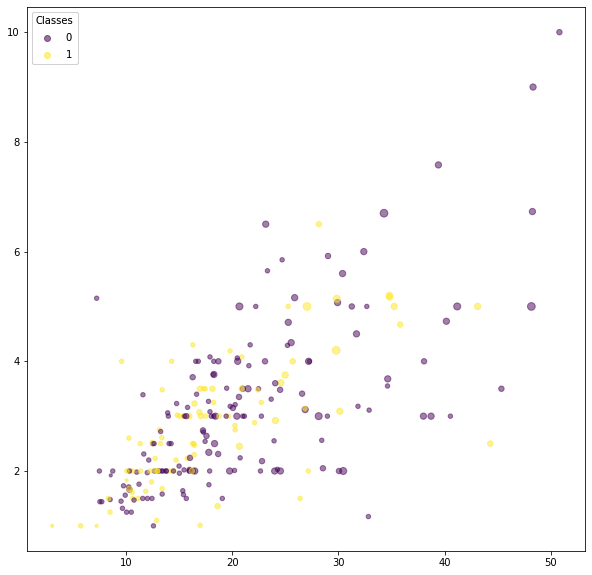

In [84]:
def recode_gender(gender):
    if gender == 'Female':
        return 1
    else:
        return 0

tips['gender_num'] = tips['sex'].apply(recode_gender)
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
scatter = ax.scatter(tips['total_bill'], tips['tip'],
           s = tips['size']*10,
           c = tips['gender_num'], 
           alpha = 0.5)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="center left", title="Sizes")

plt.show()

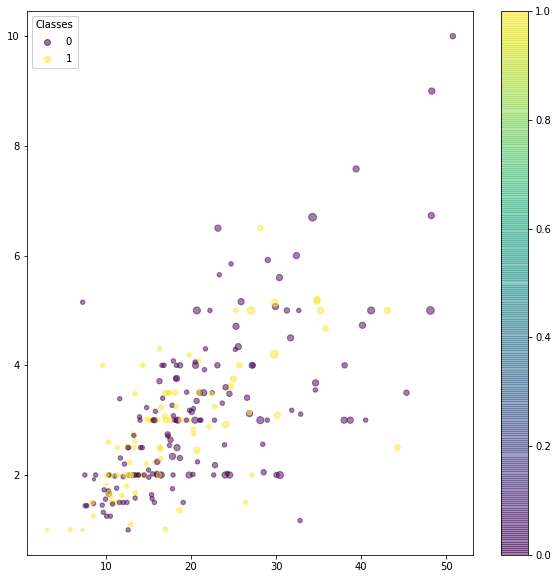

In [85]:
def recode_gender(gender):
    if gender == 'Female':
        return 1
    else:
        return 0

tips['gender_num'] = tips['sex'].apply(recode_gender)
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
scatter = ax.scatter(tips['total_bill'], tips['tip'],
           s = tips['size']*10,
           c = tips['gender_num'], 
           alpha = 0.5)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="center left", title="Sizes")
plt.colorbar(scatter)
plt.show()

## 4. seaborn

- seabornライブラリーはpandas及びPyDataスタックの他のパーツ（numpy, scipy, statsmodels）と密接に結合されているので、データ分析プロセスのどの部分からでもとても容易に可視化を行うことができる
- seabornはmatplotlib上に構築されているので、seabornを使い場合も可視化の微調整が可能


### Histogram

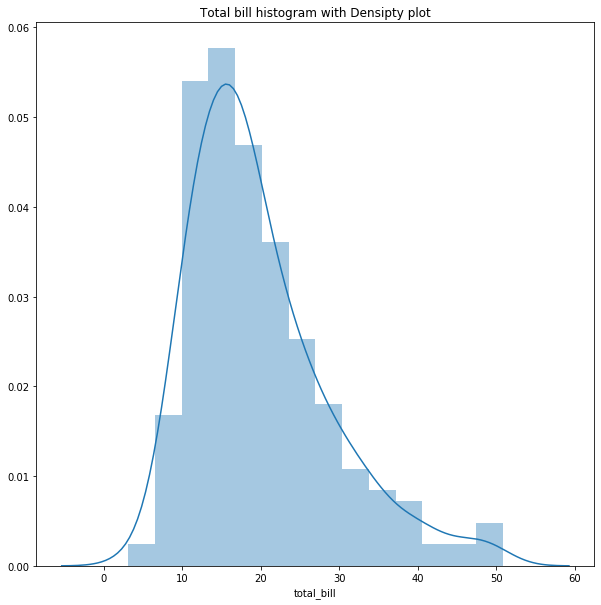

In [86]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
sns.distplot(tips['total_bill'], ax = ax)
ax.set_title('Total bill histogram with Densipty plot');

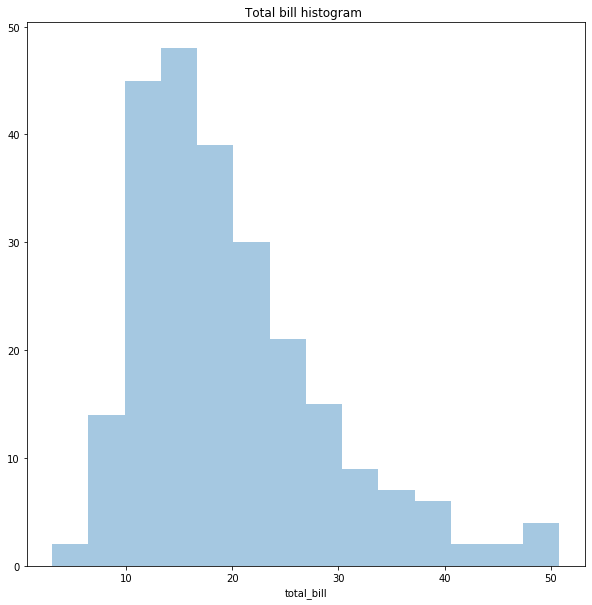

In [87]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
sns.distplot(tips['total_bill'], ax = ax, kde = False)
ax.set_title('Total bill histogram ');

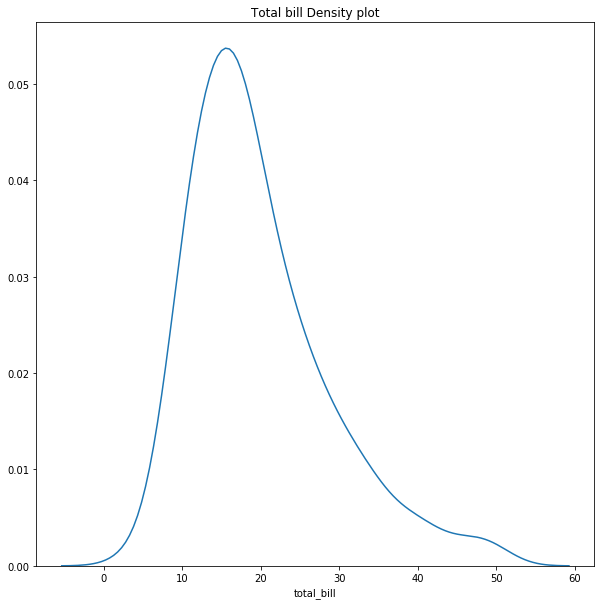

In [88]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
sns.distplot(tips['total_bill'], ax = ax, hist = False)
ax.set_title('Total bill Density plot');

### rug plot

- rug plotとは、ある変量の分布を１次元で表現するものだ。可視化を強化するため、他のプロットと組み合わせて使われることが多い

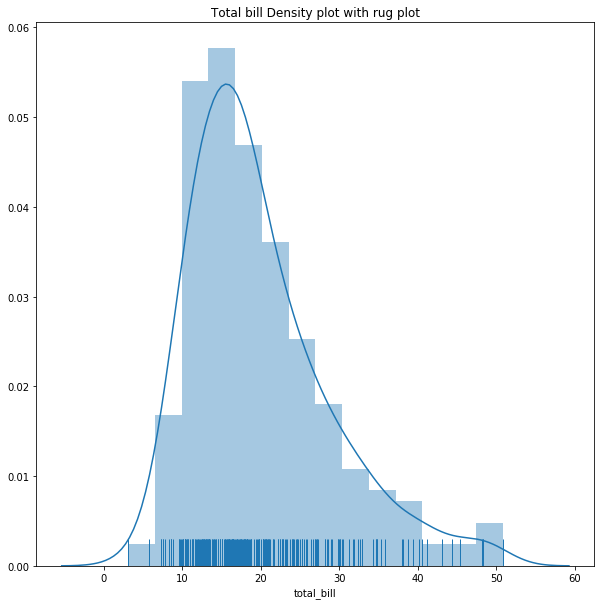

In [89]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
sns.distplot(tips['total_bill'], ax = ax, rug = True)
ax.set_title('Total bill Density plot with rug plot');

### countplot

- 離散変量の出現回数をプロットする目的で使用


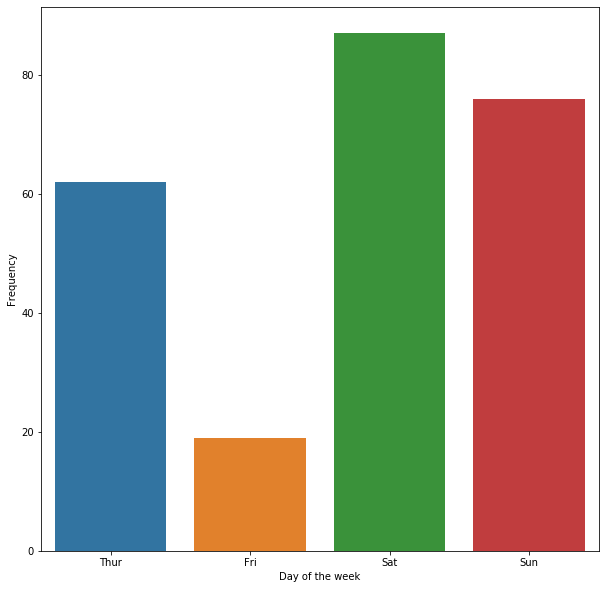

In [90]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
sns.countplot('day', data = tips, ax = ax)
ax.set_xlabel('Day of the week')
ax.set_ylabel('Frequency');

### scatter plot

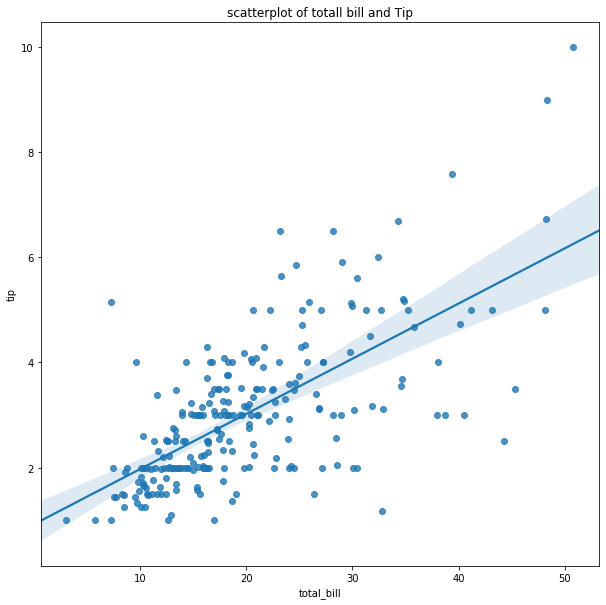

In [91]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax)
ax.set_xlabel('total_bill')
ax.set_ylabel('tip')
ax.set_title('scatterplot of totall bill and Tip');

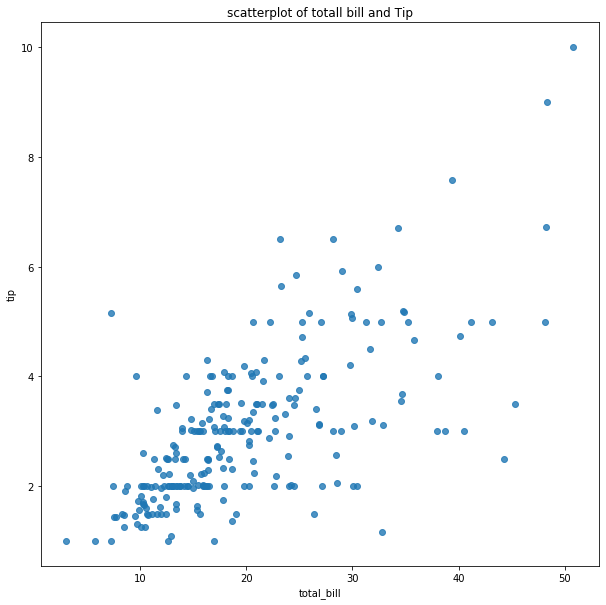

In [92]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax, fit_reg = False)
ax.set_xlabel('total_bill')
ax.set_ylabel('tip')
ax.set_title('scatterplot of totall bill and Tip');

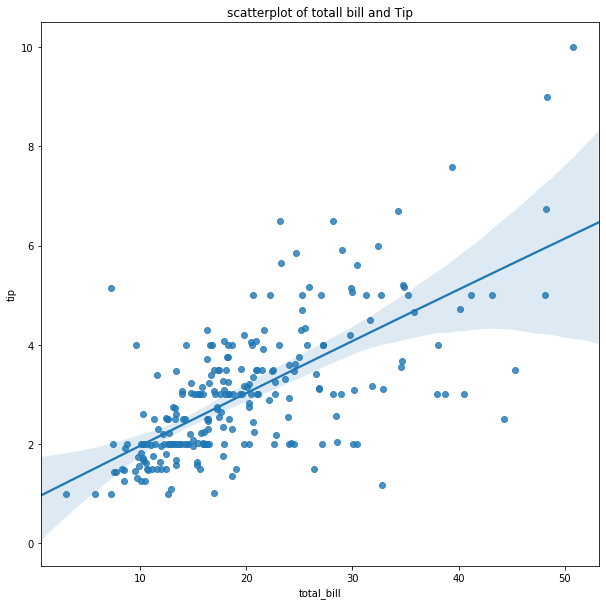

In [93]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax, order = 2)
ax.set_xlabel('total_bill')
ax.set_ylabel('tip')
ax.set_title('scatterplot of totall bill and Tip');

### lmplot

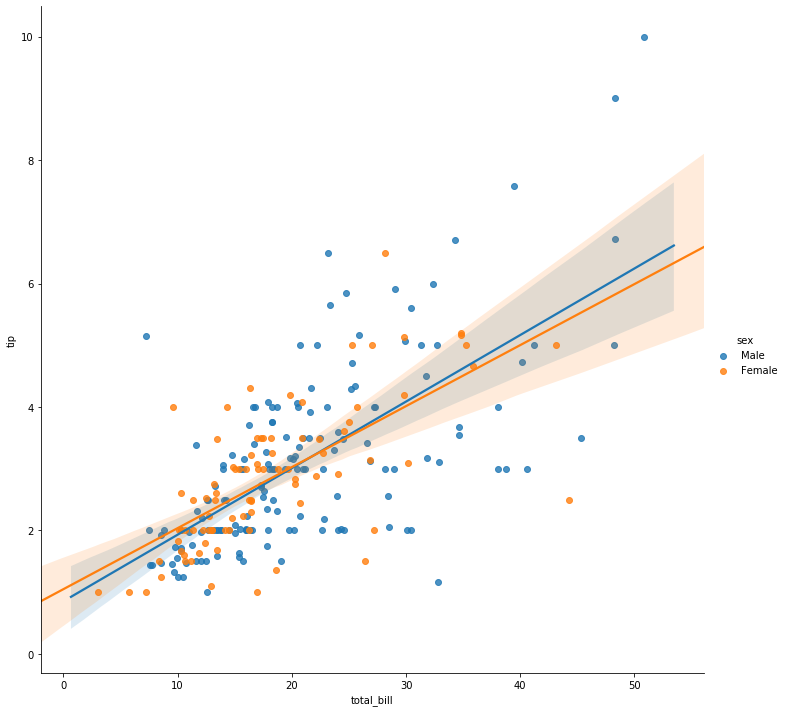

In [94]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'sex',  data = tips, height=10, aspect=1)

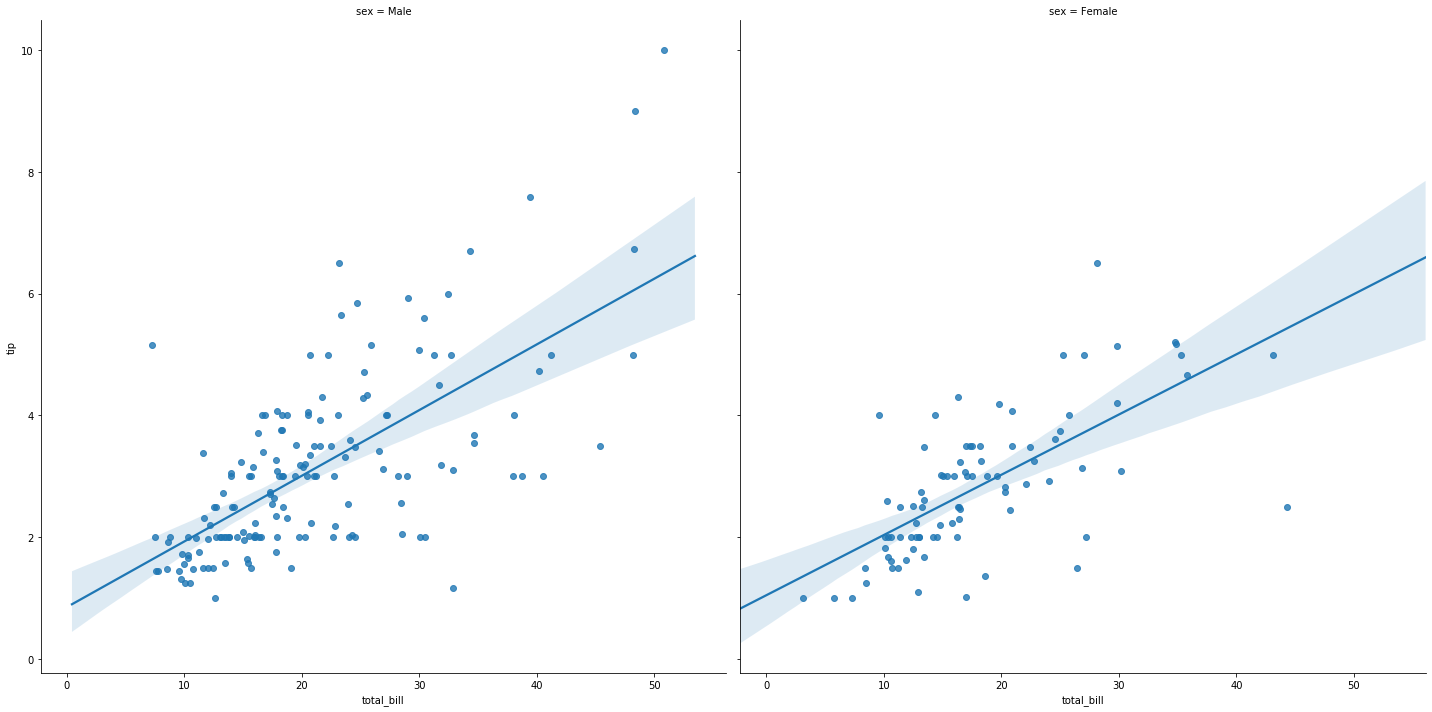

In [95]:
sns.lmplot(x = 'total_bill', y = 'tip', col = 'sex',  data = tips, height=10, aspect=1)

### jointplot

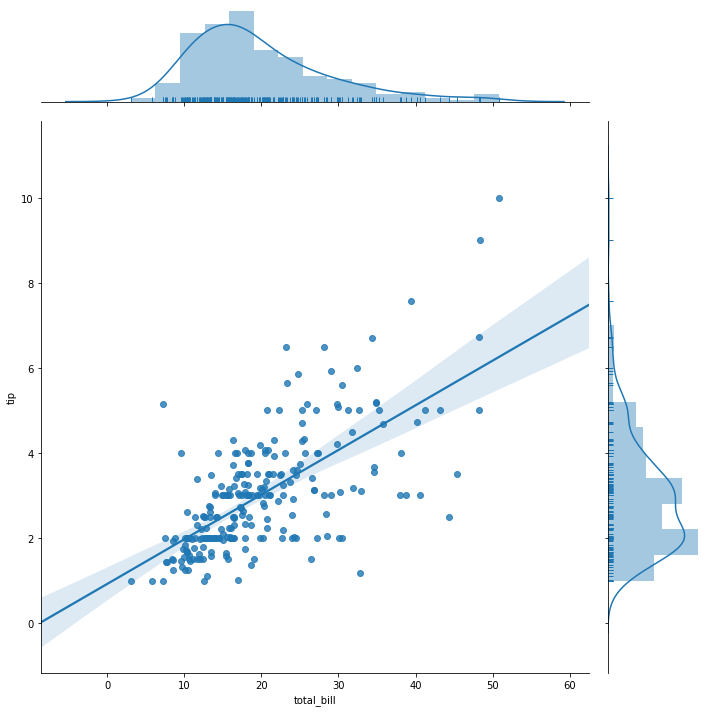

In [96]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind="reg", height=10, ratio=5,
              marginal_kws=dict(bins=15, rug=True));

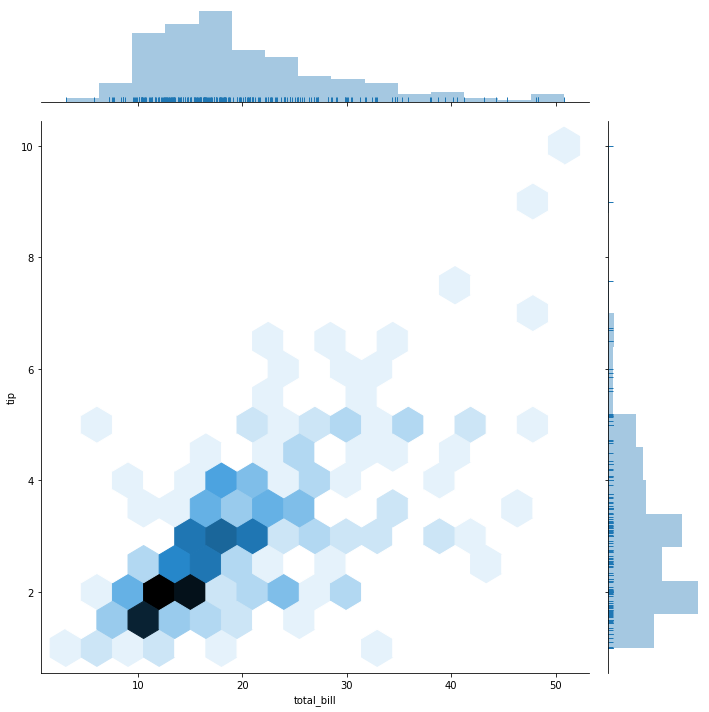

In [97]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind="hex", height=10, ratio=5,
              marginal_kws=dict(bins=15, rug=True));

### kdeplot

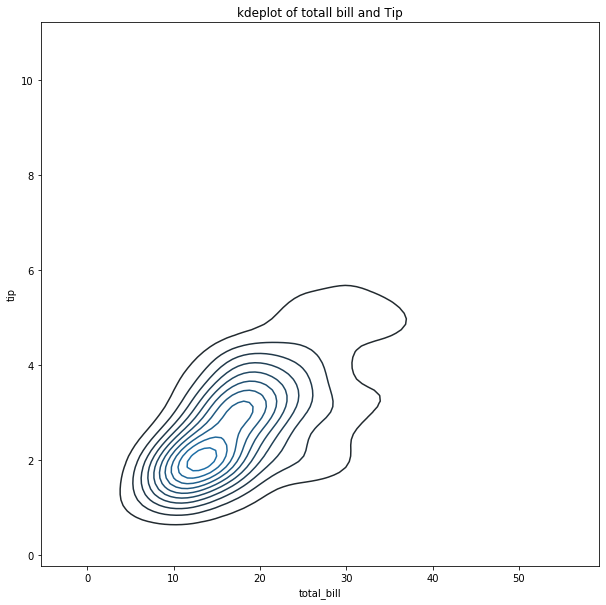

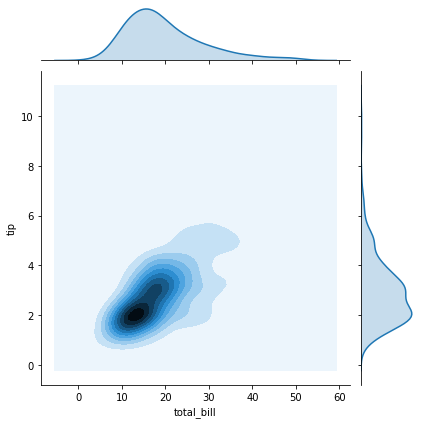

In [98]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

sns.kdeplot(data = tips['total_bill'], data2 = tips['tip'], ax = ax) ## 輪郭を塗る
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'kde')
ax.set_xlabel('total_bill')
ax.set_ylabel('tip')
ax.set_title('kdeplot of totall bill and Tip');

### barplot

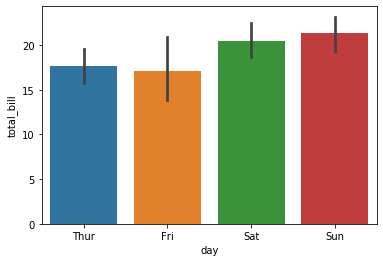

In [99]:
ax = sns.barplot(x="day", y="total_bill", data=tips)

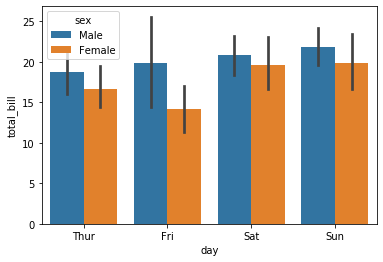

In [100]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

estimatorは色々な関数を渡すことができる。
- median
- np.sum()
- その他自作

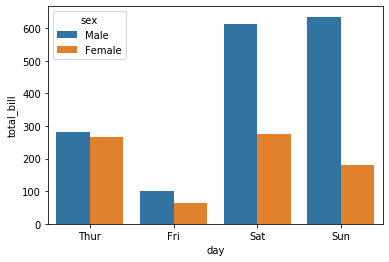

In [101]:
f = lambda x: sum(x)/2
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, estimator = f, ci=None)

### boxplot

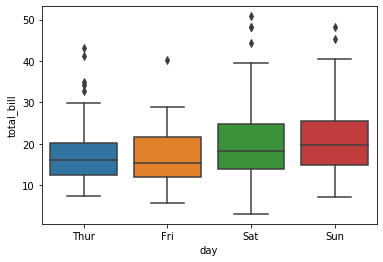

In [102]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

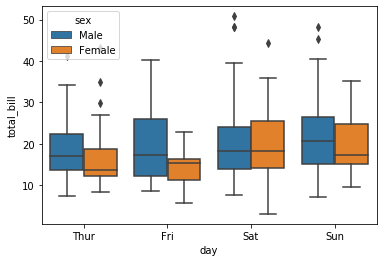

In [103]:
ax = sns.boxplot(x="day", y="total_bill", hue = 'sex', data=tips)

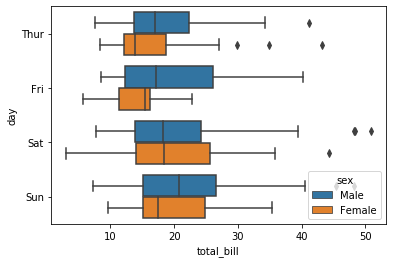

In [104]:
ax = sns.boxplot(y="day", x="total_bill", hue = 'sex', data=tips)

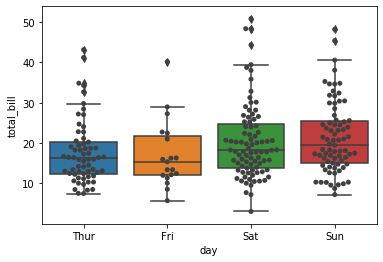

In [105]:
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

violin plotはboxplotのboxをkdeで表現したもの

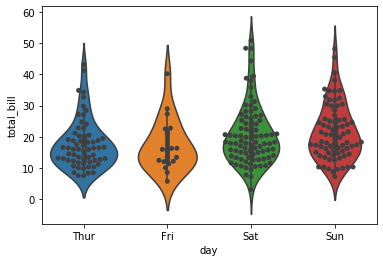

In [106]:
sns.violinplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

### すべてのpairの相関を確認する

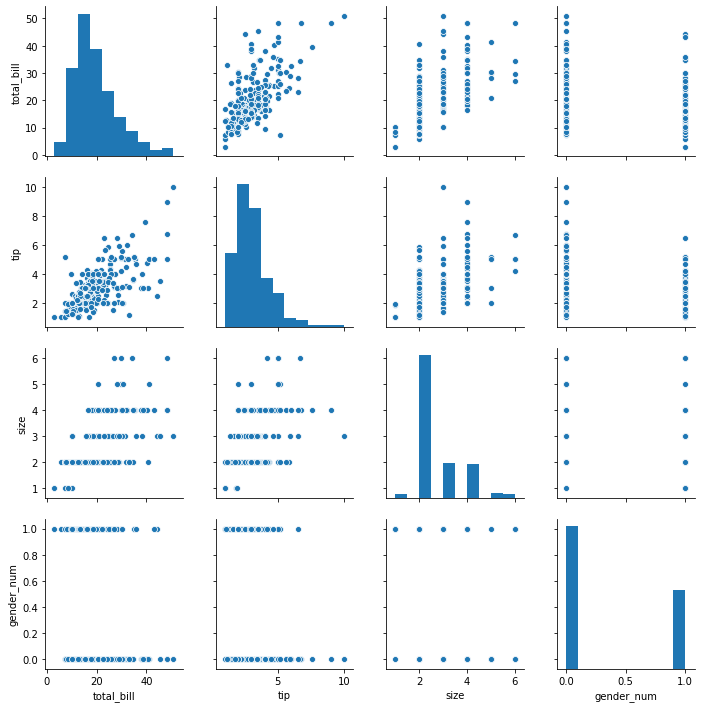

In [107]:
sns.pairplot(tips)

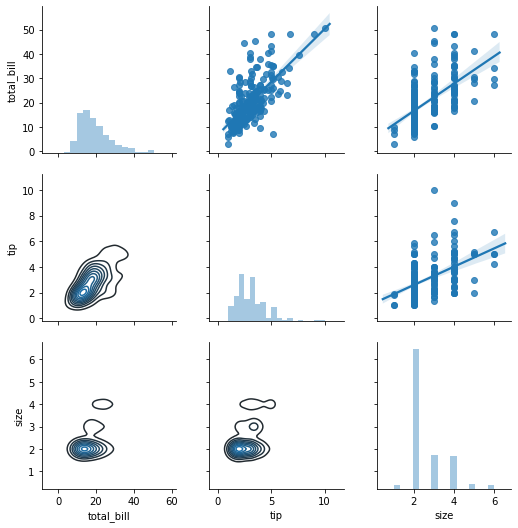

In [108]:
tips = sns.load_dataset('tips')
ax = sns.PairGrid(tips)
ax.map_upper(sns.regplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.distplot, kde = False)

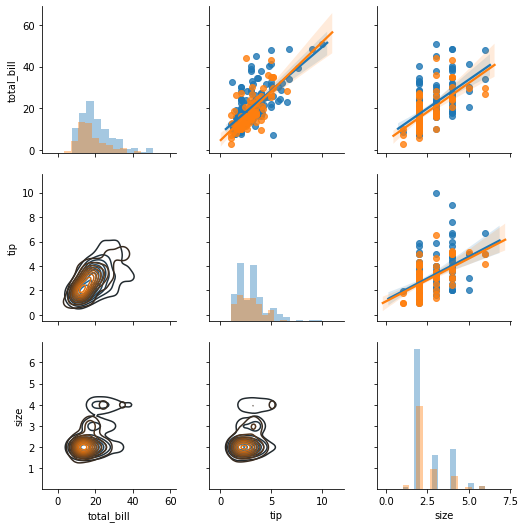

In [109]:
tips = sns.load_dataset('tips')
ax = sns.PairGrid(tips, hue = 'sex')
ax.map_upper(sns.regplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.distplot, kde = False)

### 多変量データ

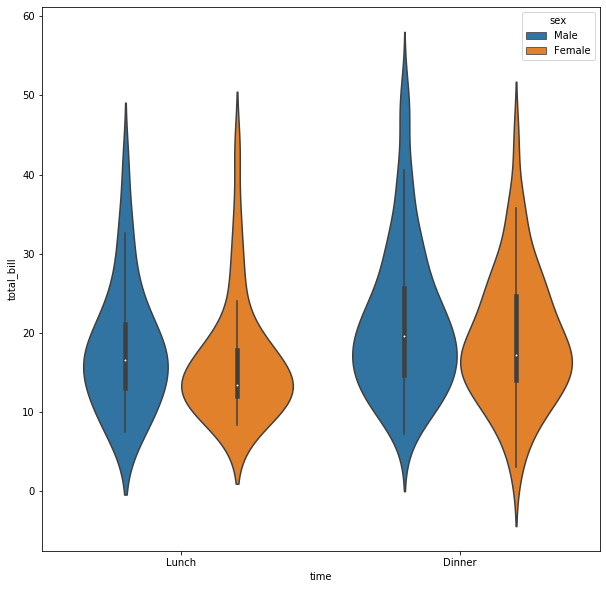

In [110]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips)

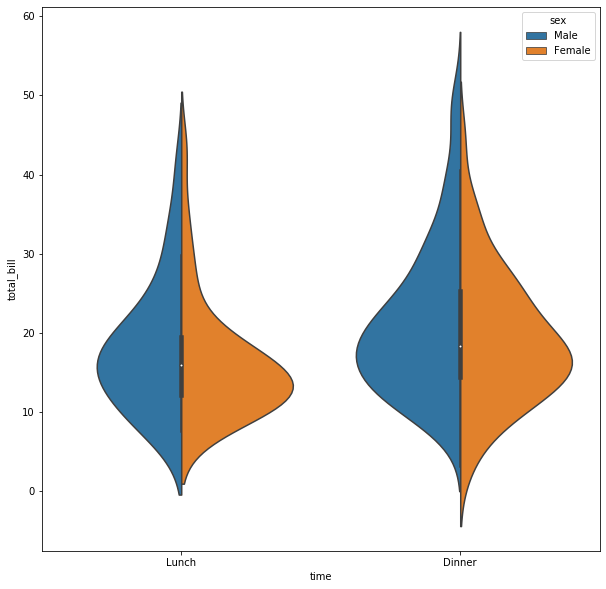

In [111]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split= True)

### size and color

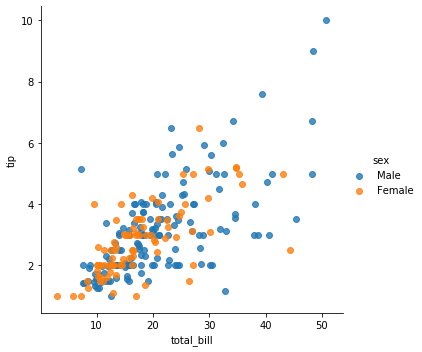

In [112]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False, hue= 'sex')

tipsの`size` columnを反映

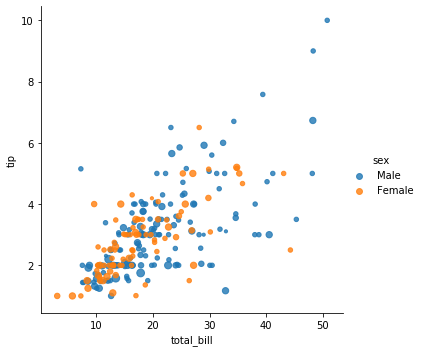

In [113]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips,
           fit_reg = False, hue= 'sex',
          scatter_kws = {'s':tips['size']*10})

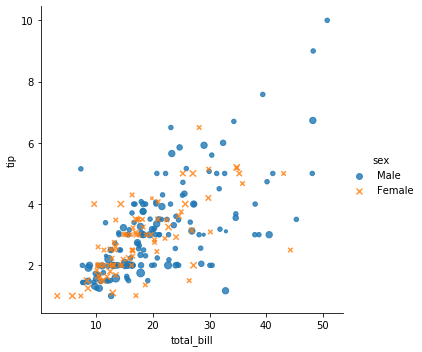

In [114]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips,
           fit_reg = False, hue= 'sex', markers = ['o', 'x'],
          scatter_kws = {'s':tips['size']*10})

### facet機能

- 一つのカテゴリ型変数に関して複数プロットが欲しい時

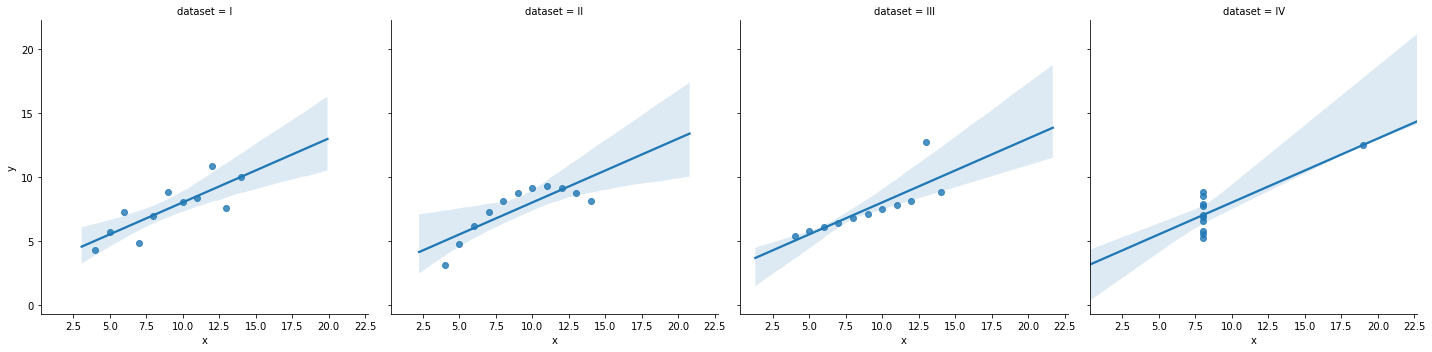

In [115]:
anscombe_plot  = sns.lmplot(x = 'x', 
                            y = 'y',
                            data = anscombe,
                            col = 'dataset')

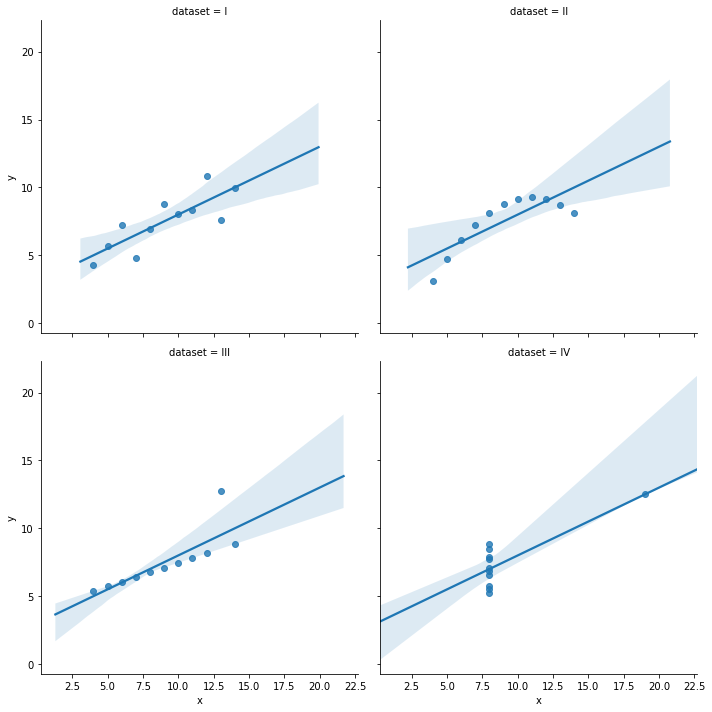

In [116]:
anscombe_plot  = sns.lmplot(x = 'x', 
                            y = 'y',
                            data = anscombe,
                            col = 'dataset',
                            col_wrap = 2 # 折り返し幅
                           )

### FacetGrid

In [117]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


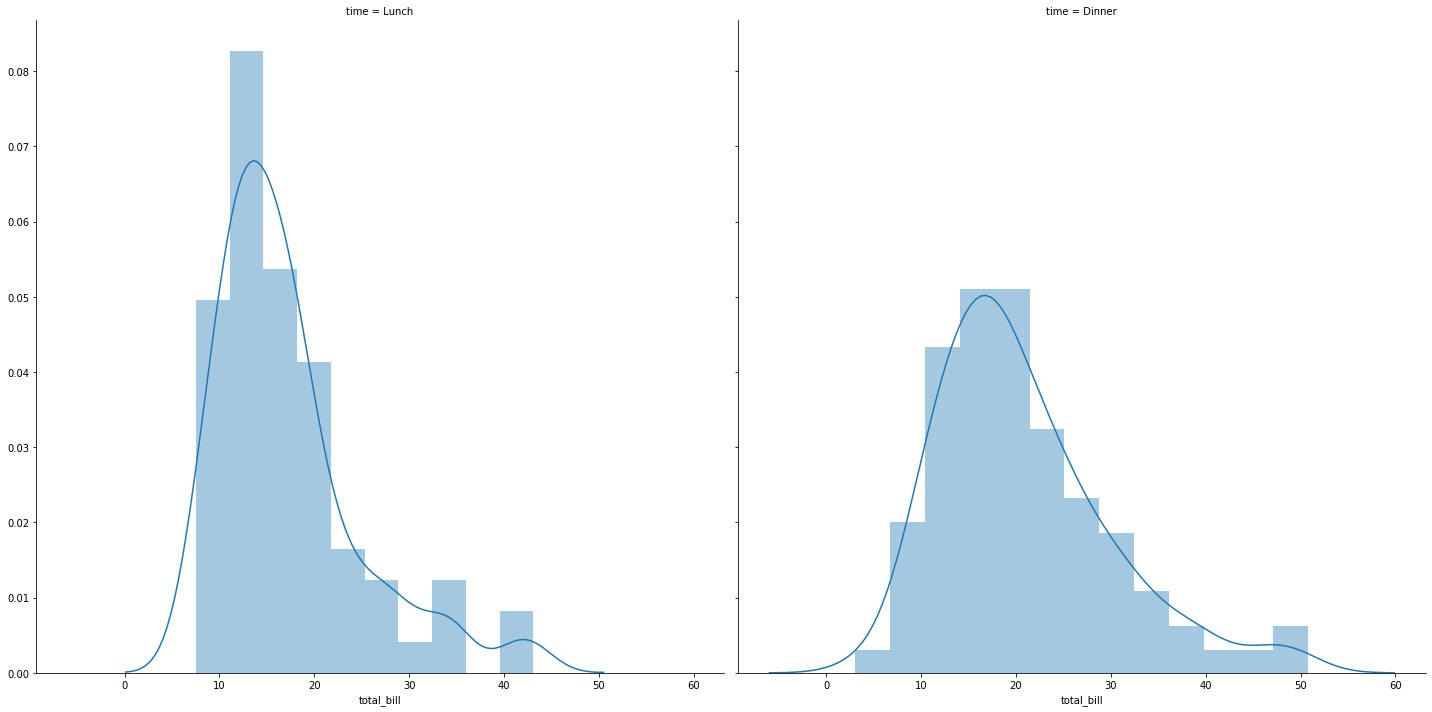

In [118]:
facet = sns.FacetGrid(tips, col = 'time', height = 10)
facet.map(sns.distplot, 'total_bill')

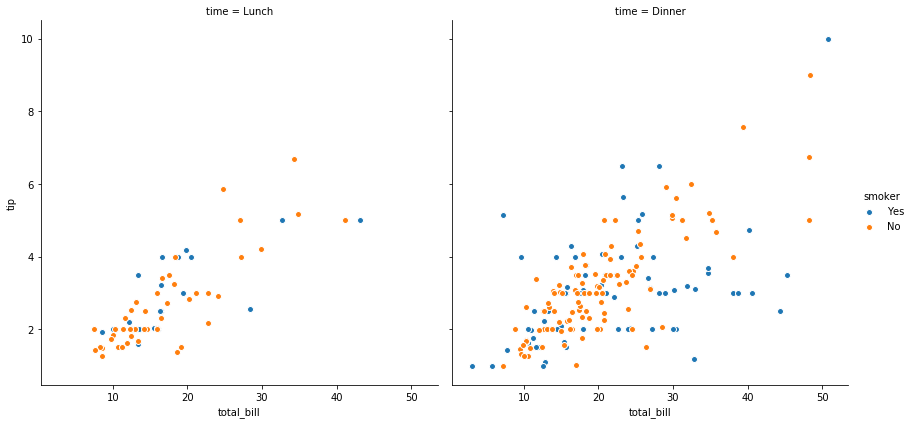

In [119]:
g = sns.FacetGrid(tips, col = 'time', hue = 'smoker', height = 6)
facet = g.map(plt.scatter, 'total_bill', 'tip', edgecolor="w")
facet = facet.add_legend()

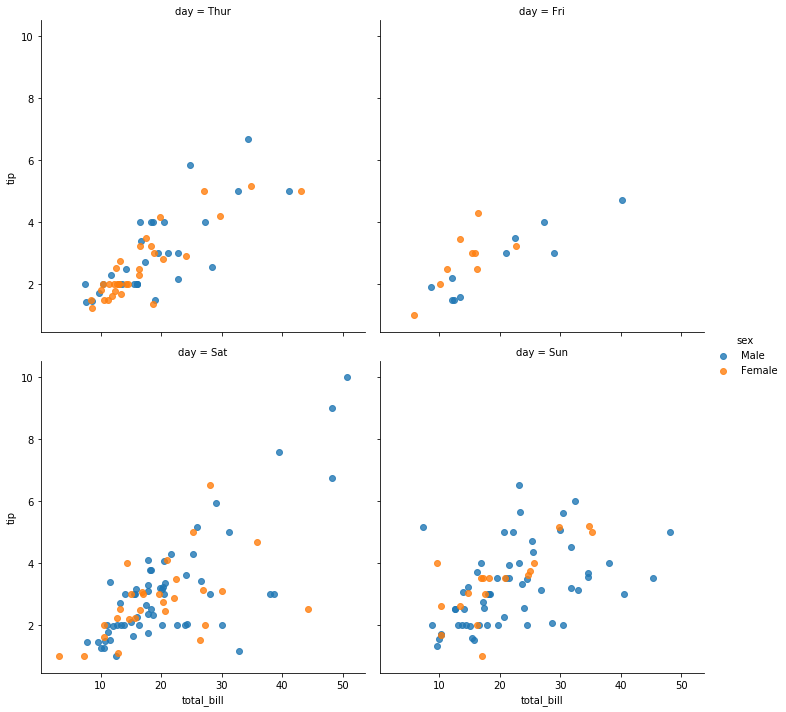

In [120]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False, hue = 'sex', col = 'day', col_wrap = 2)

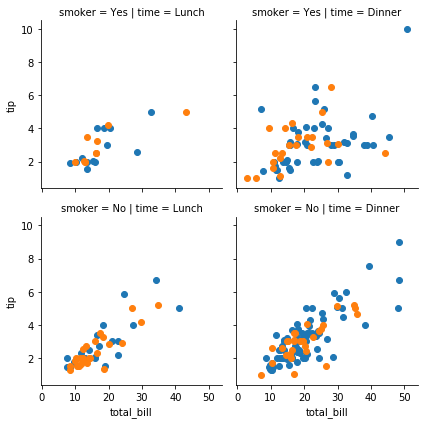

In [121]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker', hue = 'sex')
g.map(plt.scatter, 'total_bill', 'tip')
plt.show()

## 5. pandasのオブジェクトとplot

- pandas オブジェクトにも独自のプロット関数が備わっているが、matplotlibをベースとした既定値がついたラッパーにすぎない


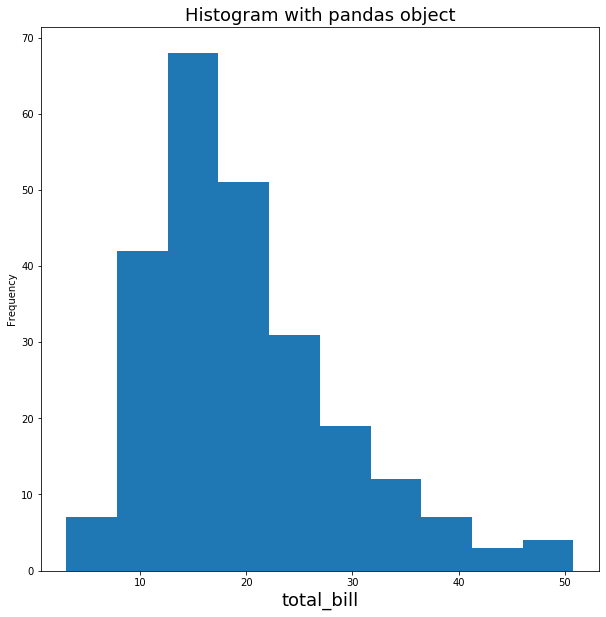

In [122]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
tips['total_bill'].plot.hist(ax = ax)
ax.set_xlabel('total_bill', fontsize=18)
ax.set_title('Histogram with pandas object', fontsize=18);

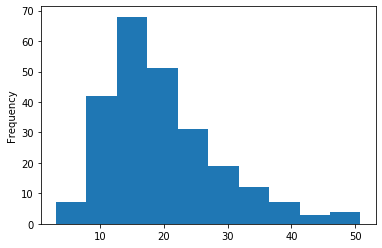

In [123]:
tips['total_bill'].plot.hist();

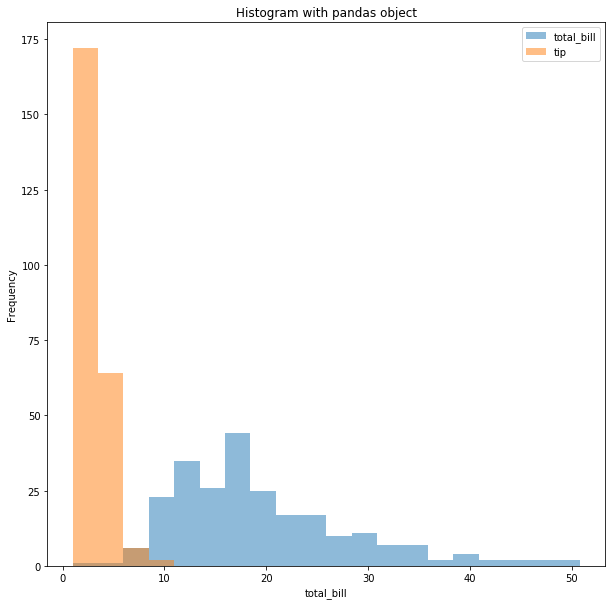

In [124]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
tips.loc[:, ['total_bill', 'tip']].plot.hist(ax = ax, alpha = 0.5, bins = 20)
ax.set_xlabel('total_bill')
ax.set_title('Histogram with pandas object');

### Density plot

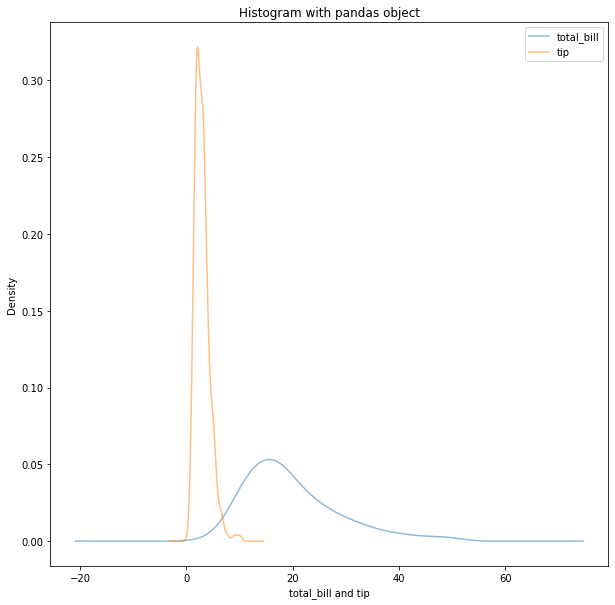

In [125]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
tips.loc[:, ['total_bill', 'tip']].plot.kde(ax = ax, alpha = 0.5)
ax.set_xlabel('total_bill and tip')
ax.set_title('Histogram with pandas object');

### pandas scatter plot

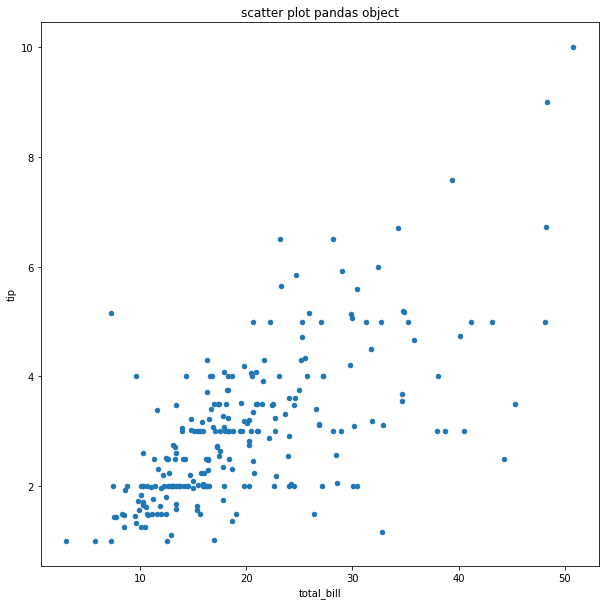

In [126]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
tips.plot.scatter(x = 'total_bill', y= 'tip', ax = ax)
ax.set_xlabel('total_bill')
ax.set_ylabel('tip')
ax.set_title('scatter plot pandas object');

### box plot

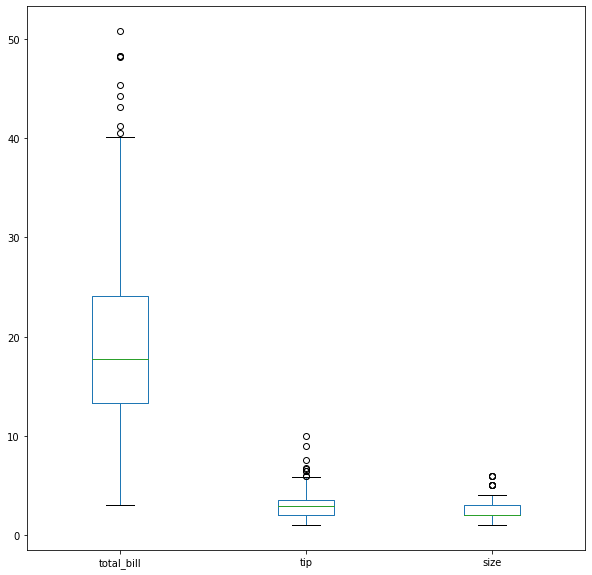

In [127]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
tips.plot.box(ax = ax)

## 6. Tidy Data

- data cleaningはdata analysis作業工程の大半を占める（およそ８割）
- data cleaningを as easy and effective as possibleにするためのTipsをhadley Wickhamがまとめている
- 対義語はmessy data

### Purpose

- data cleaningは重要だが、data scientistとしてdata analysisにかける時間を増やすべき

### 用語

- `stack` = `melt`: columnをrowsに変換すること


### Tidy Dataの特徴

- `Each variable forms a column`
- `Each observation forms a row`
- `Each type of observational unit forms a table`
- `the layout ensures that values of different variables from the same observation are always paired.`

### Messy Dataの特徴

- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table. 􏰀 A single observational unit is stored in multiple tables.



### Tidy Messy Data

#### melting

- `“Unpivots” a DataFrame from wide format to long format, optionally leaving identifier variables set`

In [128]:
df = pd.DataFrame({'a': {'us': 0, 'jp': 1, 'cn': 2},
                   'b': {'us': 1, 'jp': 3,'cn': 5},
                    'c': {'us': 2, 'jp': 4, 'cn': 6}})
df

,a,b,c
us,0,1,2
jp,1,3,4
cn,2,5,6


In [129]:
pd.melt(df)

,variable,value
0,a,0
1,a,1
2,a,2
3,b,1
4,b,3
5,b,5
6,c,2
7,c,4
8,c,6


In [130]:
pd.melt(df, id_vars=['a'], value_vars=['b'])

,a,variable,value
0,0,b,1
1,1,b,3
2,2,b,5


In [131]:
pd.melt(df, id_vars=['a'], value_vars=['b', 'c'])

,a,variable,value
0,0,b,1
1,1,b,3
2,2,b,5
3,0,c,2
4,1,c,4
5,2,c,6


#### Column headers are values, not variable names

In [132]:
url = 'https://raw.githubusercontent.com/tidyverse/tidyr/master/data-raw/relig_income.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [133]:
df.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


meltingの実行

In [134]:
melted_df = pd.melt(df ,id_vars='religion', var_name='range', value_name='count')
is_religion = melted_df['religion'] == 'Agnostic'
melted_df.loc[is_religion, :]

,religion,range,count
0,Agnostic,<$10k,27
18,Agnostic,$10-20k,34
36,Agnostic,$20-30k,60
54,Agnostic,$30-40k,81
72,Agnostic,$40-50k,76
90,Agnostic,$50-75k,137
108,Agnostic,$75-100k,122
126,Agnostic,$100-150k,109
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96


#### Melting Billboard top hits for 2000

In [135]:
url = 'https://raw.githubusercontent.com/tidyverse/tidyr/master/data-raw/billboard.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   wk1           317 non-null    int64  
 6   wk2           312 non-null    float64
 7   wk3           307 non-null    float64
 8   wk4           300 non-null    float64
 9   wk5           292 non-null    float64
 10  wk6           280 non-null    float64
 11  wk7           269 non-null    float64
 12  wk8           260 non-null    float64
 13  wk9           253 non-null    float64
 14  wk10          244 non-null    float64
 15  wk11          236 non-null    float64
 16  wk12          222 non-null    float64
 17  wk13          210 non-null    float64
 18  wk14          204 non-null    

In [136]:
df.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
billboard = pd.melt(df, id_vars=['year','artist','track','time','date.entered'], var_name='week', value_name = 'rank')
billboard.head()

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


`billboard.astype({'rank':np.int})`とやりたいところだが、 NaN は浮動小数点数型にしか存在しない概念なのでできない。

In [138]:
billboard['rank'].fillna(-1, inplace=True)
billboard.astype({'rank':np.int64})

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,-1
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,-1
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,-1
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,-1


#### Multiple variables stored in one column

In [139]:
url = 'https://raw.githubusercontent.com/hadley/tidy-data/master/data/tb.csv'
df = pd.read_csv(url)
df.head()

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
melted_df = pd.melt(df, id_vars = ['iso2', 'year'], var_name = 'column', value_name = 'cases')
melted_df = melted_df.dropna().reset_index(drop = True)
melted_df = melted_df.astype({'cases':np.int})
melted_df.head()

,iso2,year,column,cases
0,AD,1993,new_sp,15
1,AD,1994,new_sp,24
2,AD,1996,new_sp,8
3,AD,1997,new_sp,17
4,AD,1998,new_sp,1


論文に倣って`year == 2000`にデータを限定する

In [143]:
is_index = melted_df['year'] == 2000
melted_df.loc[is_index,'column'].unique()

array(['new_sp', 'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534',
       'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65',
       'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544',
       'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65'], dtype=object)

- `m/f`: male/female
- 数値：年齢層, `u`はunknown

In [220]:
df_2000 = melted_df.loc[is_index, :].reset_index(drop = True)
df_2000.head()

,iso2,year,column,cases
0,AD,2000,new_sp,1
1,AE,2000,new_sp,73
2,AF,2000,new_sp,2892
3,AG,2000,new_sp,3
4,AL,2000,new_sp,171


In [221]:
## pandasのSettingWithCopyWarningに注意
replace_str = df_2000.loc[:, 'column'].str.replace('new_sp_?', '', regex = True).values
df_2000.loc[:, 'column'] = replace_str
df_2000['column'].unique()

array(['', 'm014', 'm1524', 'm2534', 'm3544', 'm4554', 'm5564', 'm65',
       'f014', 'f1524', 'f2534', 'f3544', 'f4554', 'f5564', 'f65'],
      dtype=object)

In [222]:
## Drop None
drop_index = df_2000['column'] == ''
df_2000_dropped = df_2000.loc[~drop_index, :].reset_index(drop = True)
df_2000_dropped['gender'] = df_2000_dropped.column.str[0].values
df_2000_dropped['age'] = df_2000_dropped.column.str[1:].values
df_2000_dropped

,iso2,year,column,cases,gender,age
0,AD,2000,m014,0,m,014
1,AE,2000,m014,2,m,014
2,AF,2000,m014,52,m,014
3,AG,2000,m014,0,m,014
4,AL,2000,m014,2,m,014
...,...,...,...,...,...,...
2254,VU,2000,f65,1,f,65
2255,WS,2000,f65,0,f,65
2256,YE,2000,f65,92,f,65
2257,ZA,2000,f65,80,f,65


### Variables are stored in both rows and columns

メキシコのある気象観測所 (MX17004) での日々の気象データを扱う。「年」・「月」軸に対して一日目(d1)、二日目(d2)、、と日が横軸に並んでいますが、更にelementカラムでその日の最高・最低気温の２つを行として持っています

In [256]:
url = 'https://raw.githubusercontent.com/hadley/tidy-data/master/data/weather.txt'
pd.read_csv(url, engine = 'python').tail()

,MX000017004195504TMAX 310 I 310 I 310 I 320 I 330 I 320 I 320 I 330 I 330 I 330 I 330 I 320 I 310 I 310 I 320 I 320 I 320 I 310 I 310 I 320 I 320 I 330 I 330 I 330 I 330 I 330 I 330 I 340 I 330 I 320 I-9999
1708,MX000017004201103TMIN-9999 -9999 -9999 -...
1709,MX000017004201103PRCP 0 S-9999 0 S ...
1710,MX000017004201104TMAX-9999 350 S-9999 -...
1711,MX000017004201104TMIN-9999 168 S-9999 -...
1712,MX000017004201104PRCP 0 S 0 S-9999 -...


#### Dataの読み込み

In [251]:
import urllib.request
from io import StringIO

In [239]:
req = urllib.request.Request(url)
with urllib.request.urlopen(req) as response:
    the_page = response.read()

In [250]:
type(the_page)

bytes

#### 方針

- ` I `を除去する
- sepは`\s{3}`
- dataframeに落とし込む

In [327]:
s = str(the_page,'utf-8')
s = re.split(r'\n|\s{1,}|\t', s)
s = [i for i in s if i != 'I' and i != 'S' and i != '']

data = []
row = []
s.append('MX')
for i in s:
    if i.startswith('MX'):
        data.append(row)
        row = [i]
    else:
        row.append(i)
data = data[1:]

In [329]:
test = pd.DataFrame(data)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,MX000017004195504TMAX,310,310,310,320,330,320,320,330,330,...,330,330,330,330,340,330,320,I-9999,None,None
1,MX000017004195504TMIN,150,150,160,150,160,160,160,160,160,...,170,180,190,190,170,180,160,I-9999,None,None
2,MX000017004195504PRCP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,I-9999,None,None
3,MX000017004195505TMAX,310,310,310,300,300,300,310,310,310,...,350,330,310,310,320,310,300,290,None,None
4,MX000017004195505TMIN,200,160,160,150,150,150,160,160,170,...,190,190,180,160,150,170,150,160,None,None


In [341]:
n = len('MX000017004')
test['id'] = test.iloc[:, 0].str[:n]
test['year'] = test.iloc[:, 0].str[n:n+4]
test['month'] = test.iloc[:, 0].str[n+4:n+6]
test['element'] = test.iloc[:, 0].str[n+6:n+10]
test_2 = test.iloc[:, 1:]
test_2.head()

,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,id,year,month,element
0,310,310,310,320,330,320,320,330,330,330,...,340,330,320,I-9999,None,None,MX000017004,1955,04,TMAX
1,150,150,160,150,160,160,160,160,160,170,...,170,180,160,I-9999,None,None,MX000017004,1955,04,TMIN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,6,I-9999,None,None,MX000017004,1955,04,PRCP
3,310,310,310,300,300,300,310,310,310,300,...,320,310,300,290,None,None,MX000017004,1955,05,TMAX
4,200,160,160,150,150,150,160,160,170,170,...,150,170,150,160,None,None,MX000017004,1955,05,TMIN


In [355]:
colname = list(test_2.columns)
colname2 = []
for i in colname:
    i = str(i)
    if re.fullmatch('\d{1,}', i):
        i = 'd' + i   
    colname2.append(i)

In [359]:
test_2.columns = colname2
test_2.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d28,d29,d30,d31,d32,d33,id,year,month,element
0,310,310,310,320,330,320,320,330,330,330,...,340,330,320,I-9999,None,None,MX000017004,1955,04,TMAX
1,150,150,160,150,160,160,160,160,160,170,...,170,180,160,I-9999,None,None,MX000017004,1955,04,TMIN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,6,I-9999,None,None,MX000017004,1955,04,PRCP
3,310,310,310,300,300,300,310,310,310,300,...,320,310,300,290,None,None,MX000017004,1955,05,TMAX
4,200,160,160,150,150,150,160,160,170,170,...,150,170,150,160,None,None,MX000017004,1955,05,TMIN


In [362]:
## meltの実行
weather_melt = pd.melt(test_2, id_vars=['id','year','month','element'], var_name='day', value_name='temp')
weather_melt

,id,year,month,element,day,temp
0,MX000017004,1955,04,TMAX,d1,310
1,MX000017004,1955,04,TMIN,d1,150
2,MX000017004,1955,04,PRCP,d1,0
3,MX000017004,1955,05,TMAX,d1,310
4,MX000017004,1955,05,TMIN,d1,200
...,...,...,...,...,...,...
56557,MX000017004,2011,03,TMIN,d33,None
56558,MX000017004,2011,03,PRCP,d33,None
56559,MX000017004,2011,04,TMAX,d33,None
56560,MX000017004,2011,04,TMIN,d33,None


In [367]:
weather_tidy = weather_melt.pivot_table(index=['id','year','month','day'], columns='element', values='temp',  aggfunc='sum')
weather_tidy

element                       PRCP   TMAX   TMIN
id          year month day                      
MX000017004 1955 04    d1        0    310    150
                       d10       0    330    170
                       d11       0    330    170
                       d12       0    320    160
                       d13       0    310    160
...                            ...    ...    ...
            2011 04    d5        0  -9999  -9999
                       d6        0  -9999  -9999
                       d7   S-9999  -9999  -9999
                       d8    -9999  -9999  -9999
                       d9    -9999  -9999  -9999

[19371 rows x 3 columns]

In [369]:
weather_tidy.reset_index().iloc[:, 1:]

element,year,month,day,PRCP,TMAX,TMIN
0,1955,04,d1,0,310,150
1,1955,04,d10,0,330,170
2,1955,04,d11,0,330,170
3,1955,04,d12,0,320,160
4,1955,04,d13,0,310,160
...,...,...,...,...,...,...
19366,2011,04,d5,0,-9999,-9999
19367,2011,04,d6,0,-9999,-9999
19368,2011,04,d7,S-9999,-9999,-9999
19369,2011,04,d8,-9999,-9999,-9999


### Multiple types in one table

<img src = 'https://github.com/RyoNakagami/omorikaizuka/blob/master/IT101/https---qiita-image-store.s3.amazonaws.com-0-108535-fa67d331-b0d9-66fc-100b-6394c8a56e30-2.png?raw=true'>

In [370]:
billboard.head()

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


In [373]:
billboard_songs = billboard.iloc[:, 0:4].copy().drop_duplicates()
billboard_songs.head()

,year,artist,track,time
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22
1,2000,2Ge+her,The Hardest Part Of ...,3:15
2,2000,3 Doors Down,Kryptonite,3:53
3,2000,3 Doors Down,Loser,4:24
4,2000,504 Boyz,Wobble Wobble,3:35


#### idの生成

In [374]:
billboard_songs['id'] = range(len(billboard_songs))

In [375]:
billboard_songs.head()

,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,1
2,2000,3 Doors Down,Kryptonite,3:53,2
3,2000,3 Doors Down,Loser,4:24,3
4,2000,504 Boyz,Wobble Wobble,3:35,4


In [376]:
billboard_ratings = billboard.merge(billboard_songs, on=['year','artist','track','time'])
billboard_ratings

,year,artist,track,time,date.entered,week,rank,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,0
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,0
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,0
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,0
...,...,...,...,...,...,...,...,...
24087,2000,matchbox twenty,Bent,4:12,2000-04-29,wk72,-1.0,316
24088,2000,matchbox twenty,Bent,4:12,2000-04-29,wk73,-1.0,316
24089,2000,matchbox twenty,Bent,4:12,2000-04-29,wk74,-1.0,316
24090,2000,matchbox twenty,Bent,4:12,2000-04-29,wk75,-1.0,316


In [377]:
billboard_ratings = billboard_ratings.loc[:,['id','date.entered','week','rank']]
billboard_ratings.head()

,id,date.entered,week,rank
0,0,2000-02-26,wk1,87.0
1,0,2000-02-26,wk2,82.0
2,0,2000-02-26,wk3,72.0
3,0,2000-02-26,wk4,77.0
4,0,2000-02-26,wk5,87.0


### One type in multiple tables

観測した事実が複数のデータセット群にバラバラに格納されていては、分析の際に不便です。以下のようにカラムのレイアウトが同一の複数のデータセット群を連結してひとつにする。

In [378]:
import glob

In [380]:
concat_files = glob.glob('../data/data*')
concat_files

['../data/data3.csv', '../data/data2.csv', '../data/data1.csv']

In [381]:
list_concat_df =[]
for file in concat_files:
    df = pd.read_csv(file)
    list_concat_df.append(df)
pd.concat(list_concat_df, ignore_index=True)

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a0,b0,c0,d0
9,a1,b1,c1,d1


## 7. データを組み立てる